Age and its impact on fight results

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../../data/ufc-master.csv')

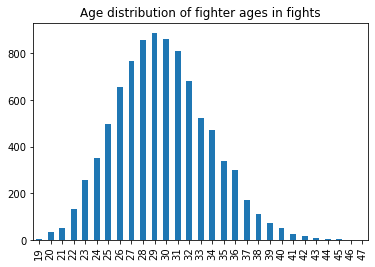

In [3]:
ages = pd.concat([data['B_age'], data['R_age']])
age_counts = ages.value_counts().sort_index()
age_dist_plot = age_counts.plot(kind='bar', title='Age distribution of fighter ages in fights')

If we don't know anything else except the age of both fighters, which one should we pick?

In [4]:
#Excluding fights where fighters have the same age
no_equal = data['age_dif'] != 0
data_filtered = data[no_equal][['age_dif', 'Winner', 'B_age', 'R_age', 'B_total_rounds_fought', 'R_total_rounds_fought']]
younger_wins = 0
for i in range(len(data_filtered)):
    #The age difference is calculated as blue - red so negative value means that the blue fighter was younger
    if (data_filtered['age_dif'].iloc[i] < 0) & (data_filtered['Winner'].iloc[i] == 'Blue'):
        younger_wins += 1
    elif (data_filtered['age_dif'].iloc[i] > 0) & (data_filtered['Winner'].iloc[i] == 'Red'):
        younger_wins += 1
win_ratio = younger_wins / len(data_filtered)
print("Younger fighter wins " + str(round(win_ratio * 100, 2)) + "% of the time.")
print("Number of fights where fighters had different age: " + str(len(data_filtered)) + ".")

Younger fighter wins 44.44% of the time.
Number of fights where fighters had different age: 4138.


According to this we should pick the older fighter most of the time.

To get more information about it lets look the average age difference in the fights where the older fighter won.

In [5]:
older_won = ((data_filtered['age_dif'] > 0) & (data_filtered['Winner'] == 'Blue') 
           | (data_filtered['age_dif'] < 0) & (data_filtered['Winner'] == 'Red'))
data_older_won = data_filtered[older_won]
sum_age_dif = 0
sum_age = 0
for i in range(len(data_older_won)):
    sum_age_dif += abs(data_older_won['age_dif'].iloc[i])
    if (data_older_won['age_dif'].iloc[i] > 0):
        sum_age += data_older_won['B_age'].iloc[i]
    else:
        sum_age += data_older_won['R_age'].iloc[i]
average_dif = sum_age_dif / len(data_older_won)
average_age = sum_age / len(data_older_won)
print("Average age difference in fights where the older fighter won was: " + str(round(average_dif, 2)) + " years.")
print("The average age of a winner in these fights was: " + str(round(average_age, 2)) + " years.")

Average age difference in fights where the older fighter won was: 4.64 years.
The average age of a winner in these fights was: 27.68 years.


This is a little bit surprising. As we can see the age of the winner in fights where the older fighter won is not that high actually. From the age distribution before we saw that in most fights the fighters are between 27-29 years old so this affects the result a lot it seems.

Are there any differences between experiences of two fighters where the older fighter won? It is hard to measure experience, but one of the ways to do so is to look at the difference in total number of rounds (one round is 5 minutes) fought by each fighter during their careers so far.

In [6]:
sum_older_rounds = 0
sum_younger_rounds = 0
for i in range(len(data_older_won)):
    if (data_older_won['age_dif'].iloc[i] > 0):
        sum_older_rounds += data_older_won['B_total_rounds_fought'].iloc[i]
        sum_younger_rounds += data_older_won['R_total_rounds_fought'].iloc[i]
    else:
        sum_older_rounds += data_older_won['R_total_rounds_fought'].iloc[i]
        sum_younger_rounds += data_older_won['B_total_rounds_fought'].iloc[i]
average_older = sum_older_rounds / len(data_older_won)
average_younger = sum_younger_rounds / len(data_older_won)
print("In fights where the older fighter won the winner had previously fought on average " + str(round(average_older, 2)) + " rounds in total.")
print("The younger fighter who lost had previously fought on average " + str(round(average_younger, 2)) + " rounds in total.")

In fights where the older fighter won the winner had previously fought on average 11.77 rounds in total.
The younger fighter who lost had previously fought on average 14.88 rounds in total.


These results do not suggest like the older fighters have more fightint experience, but we have to take into consideration that these count only rounds fought in the UFC and do not take into consideration fights in other promotions prior to arriving in the UFC. Because of that this remains a little bit inconclusive at the moment and there is really no way of measuring the time spent in the gym training, which is extremely important as well.

Before moving on let's also check the average age of the winner and age difference between the two fighters in the fights where the younger fighter won.

In [7]:
younger_won = ((data_filtered['age_dif'] < 0) & (data_filtered['Winner'] == 'Blue') 
           | (data_filtered['age_dif'] > 0) & (data_filtered['Winner'] == 'Red'))
data_younger_won = data_filtered[younger_won]
sum_age_dif2 = 0
sum_age2 = 0
for i in range(len(data_younger_won)):
    sum_age_dif2 += abs(data_younger_won['age_dif'].iloc[i])
    if (data_younger_won['age_dif'].iloc[i] > 0):
        sum_age2 += data_younger_won['B_age'].iloc[i]
    else:
        sum_age2 += data_younger_won['R_age'].iloc[i]
average_dif2 = sum_age_dif2 / len(data_younger_won)
average_age2 = sum_age2 / len(data_younger_won)
print("Average age difference in fights where the younger fighter won was: " + str(round(average_dif2, 2)) + " years.")
print("The average age of a winner in these fights was: " + str(round(average_age2, 2)) + " years.")

Average age difference in fights where the younger fighter won was: 4.19 years.
The average age of a winner in these fights was: 27.96 years.


Again the average age of the winner was 27 years old (close to 28) and the average age difference was 4.19 years (quite similar again), which means that fighters who lost to younger fighters were usually over 32 years old. This seems to indicate that fighters do really well when they are 27 years old.

Next let's see at what point during their career (age) the fighters have the best results. To do that we have to create categories for ages. Let's choose following categories: younger than 24, 24-27, 28-31, 32-35, 36-39, 40+.

In [8]:
data_ages = data_filtered[['B_age', 'R_age', 'Winner']]

In [9]:
def place(x):
    if (x < 24):
        return 0
    elif (x < 28):
        return 1
    elif (x < 32):
        return 2
    elif (x < 36):
        return 3
    elif (x < 40):
        return 4
    return 5

wins = [0, 0, 0, 0, 0, 0]
losses = [0, 0, 0, 0, 0, 0]
for i in range(len(data_ages)):
    if (data_ages['Winner'].iloc[i] == 'Blue'):
        wins[place(data_ages['B_age'].iloc[i])] += 1
        losses[place(data_ages['R_age'].iloc[i])] += 1
    else:
        wins[place(data_ages['R_age'].iloc[i])] += 1
        losses[place(data_ages['B_age'].iloc[i])] += 1
win_probabilities = []
for i in range(len(wins)):
    win_probabilities.append(wins[i] / (wins[i] + losses[i]))

In [10]:
ages = [24, 28, 32, 36, 40]
for i in range(len(win_probabilities)):
    if i == 0:
        print("Under 24 year old fighter wins " + str(round(win_probabilities[i] * 100, 2)) + "% of his/her fights.")
    elif i == (len(win_probabilities) - 1):
        print("40+ year old fighter wins " + str(round(win_probabilities[i] * 100, 2)) + "% of his/her fights.")
    else:
        print("Fighter in the age bracket [" + str(ages[i - 1]) + ", " + str(ages[i] - 1) + "] wins " +
             str(round(win_probabilities[i] * 100, 2)) + "% of his/her fights.")

Under 24 year old fighter wins 57.96% of his/her fights.
Fighter in the age bracket [24, 27] wins 55.3% of his/her fights.
Fighter in the age bracket [28, 31] wins 50.08% of his/her fights.
Fighter in the age bracket [32, 35] wins 45.67% of his/her fights.
Fighter in the age bracket [36, 39] wins 40.99% of his/her fights.
40+ year old fighter wins 39.32% of his/her fights.


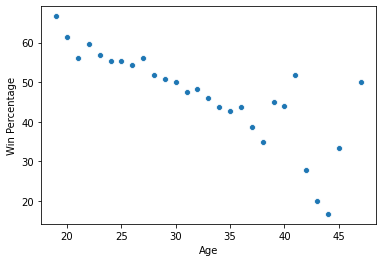

In [11]:
import seaborn as sns

blue_winners = data_ages[data_ages['Winner'] == 'Blue']['B_age']
red_losers = data_ages[data_ages['Winner'] == 'Blue']['R_age']

red_winners = data_ages[data_ages['Winner'] == 'Red']['R_age']
blue_losers = data_ages[data_ages['Winner'] == 'Red']['B_age']

winners = pd.concat([blue_winners, red_winners])
losers = pd.concat([red_losers, blue_losers])

losercounts = losers.value_counts()
win_percentages = []
for age, count in winners.value_counts().items():
    win_percentages.append([age, count/(count+losercounts.loc[age])*100])

win_percentages = pd.DataFrame(win_percentages, columns=['Age', 'Win Percentage'])
scatterplot = sns.scatterplot(data=win_percentages, x="Age", y="Win Percentage")

[]

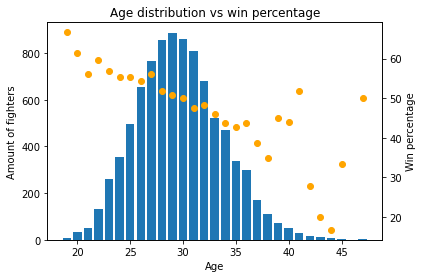

In [12]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(age_counts.index, age_counts.values)
ax2.scatter(win_percentages['Age'], win_percentages['Win Percentage'], color='orange')

ax1.set_title('Age distribution vs win percentage')
ax1.set_ylabel('Amount of fighters')
ax1.set_xlabel('Age')
ax2.set_ylabel('Win percentage')
plt.plot()

From this we can see that age is really a detrimental factor when it comes to winning the fights and experience won't help make up the difference. Once the fighter hits 30 year old mark their chances of winning the fight drop below 50%. This goes against our initial findings that it is better to pick older fighters, but is in line with our findings that in the fights where the older fighter won their average age was roughly 27-28. In conclusion it usually a good idea to pick an older fighter as long as he/she is less than 30 years old.

Closer look into under 24 year old bracket because its win percentage is quite high.

In [13]:
under24 = (data_ages['B_age'] < 24) | (data_ages['R_age'] < 24)
data_ages2 = data_ages[under24]

In [14]:
def place2(x):
    if (x < 21):
        return 0
    elif (x < 22):
        return 1
    elif (x < 23):
        return 2
    return 3

ages2 = [20, 21, 22, 23]
wins2 = [0, 0, 0, 0]
losses2 = [0, 0, 0, 0]

for i in range(len(data_ages2)):
    if (data_ages2['Winner'].iloc[i] == 'Blue'):
        wins2[place2(data_ages2['B_age'].iloc[i])] += 1
        losses2[place2(data_ages2['R_age'].iloc[i])] += 1
    else:
        wins2[place2(data_ages2['R_age'].iloc[i])] += 1
        losses2[place2(data_ages2['B_age'].iloc[i])] += 1
win_probabilities2 = []
for i in range(len(wins2)):
    win_probabilities2.append(wins2[i] / (wins2[i] + losses2[i]))

In [15]:
for i in range(len(ages2)):
    if i == 0:
        print("Fighter who is 20 or younger wins: " + str(round(win_probabilities2[i] * 100, 2)) + "% of the fights.")
        print("Wins: " + str(wins2[i]))
        print("Losses: " + str(losses2[i]) + "\n")
    else:
        print("Fighter who is " + str(ages2[i]) + " wins " + str(round(win_probabilities2[i] * 100, 2)) + "% of the fights.")
        print("Wins: " + str(wins2[i]))
        print("Losses: " + str(losses2[i]) + "\n")

Fighter who is 20 or younger wins: 62.16% of the fights.
Wins: 23
Losses: 14

Fighter who is 21 wins 56.0% of the fights.
Wins: 28
Losses: 22

Fighter who is 22 wins 59.54% of the fights.
Wins: 78
Losses: 53

Fighter who is 23 wins 47.07% of the fights.
Wins: 321
Losses: 361



One reason that might explain why the youngest fighters have such a high win percentage is that from my own experience of watching the UFC young prospects usually get easy match ups at first.

More: Before we noticed that fighters who were 27 years old won a lot so let's check win ratio for fighters who were 27 years old.

In [16]:
#We need fights where one of the fighters is 27 years old
filter27 = (data_filtered['B_age'] == 27) | (data_filtered['R_age'] == 27)
data27 = data_filtered[filter27]
wins = 0
for i in range(len(data27)):
    if (data27['Winner'].iloc[i] == 'Blue') & (data27['B_age'].iloc[i] == 27):
        wins += 1
    elif (data27['Winner'].iloc[i] == 'Red') & (data27['R_age'].iloc[i] == 27):
        wins += 1
win_percentage = round((wins / len(data27)) * 100, 2)
print("Win percentage for fighters who are 27 years old is " + str(win_percentage) + "%.")

Win percentage for fighters who are 27 years old is 56.13%.


It seems that 27 is a age where fighters tend to do really well. 56% win rate is very good.

Also win rate for fighters who where 28 years old (in our age distribution the most represented age).

In [17]:
filter28 = (data_filtered['B_age'] == 28) | (data_filtered['R_age'] == 28)
data28 = data_filtered[filter28]
wins_28 = 0
for i in range(len(data28)):
    if (data28['Winner'].iloc[i] == 'Blue') & (data28['B_age'].iloc[i] == 28):
        wins_28 += 1
    elif (data28['Winner'].iloc[i] == 'Red') & (data28['R_age'].iloc[i] == 28):
        wins_28 += 1
win_percentage_28 = round((wins_28 / len(data28)) * 100, 2)
print("Win percentage for fighters who are 28 years old is " + str(win_percentage_28) + "%.")

Win percentage for fighters who are 28 years old is 51.76%.
